In [2]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 217.9 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.9 kB 348.6 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.9 kB 392.2 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.9 kB 392.2 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 625.8 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 625.8 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 587.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Abhijeet\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

dataframe = pd.read_csv('C:/Users/Abhijeet/Desktop/Zomato_data.csv')
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:

print("Null values in the dataset:")
print(dataframe.isnull().sum())


Null values in the dataset:
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


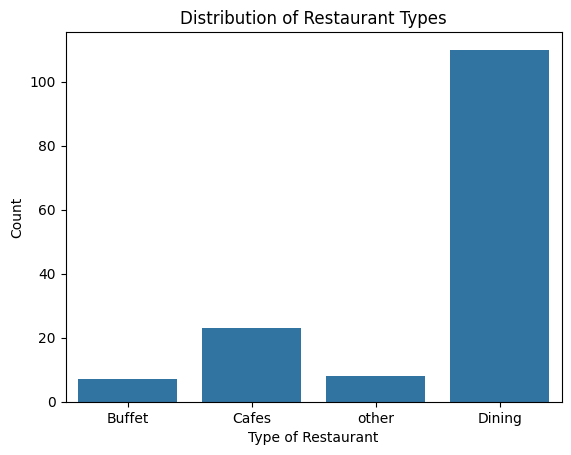

In [ ]:

# Plot restaurant types
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Types")
plt.show()


In [ ]:

# Find restaurant with maximum votes
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes.values)


Restaurant(s) with the maximum votes:
['Empire Restaurant']


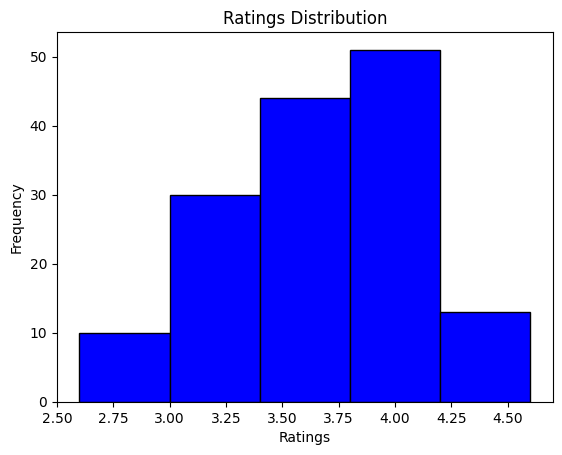

In [ ]:

# Plot ratings distribution
plt.hist(dataframe['rate'], bins=5, color='blue', edgecolor='black')
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()


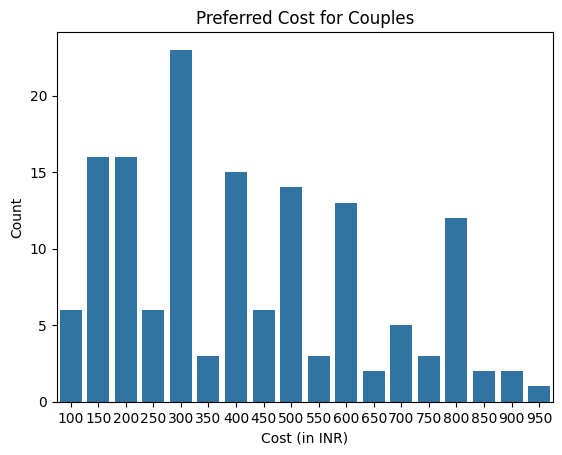

In [ ]:

# Analyze cost for couples
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.title("Preferred Cost for Couples")
plt.xlabel("Cost (in INR)")
plt.ylabel("Count")
plt.show()


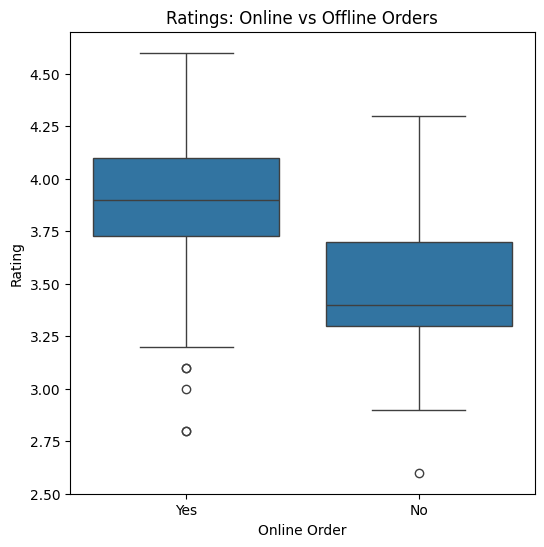

In [17]:

# Compare online vs offline ratings
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.title("Ratings: Online vs Offline Orders")
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.show()


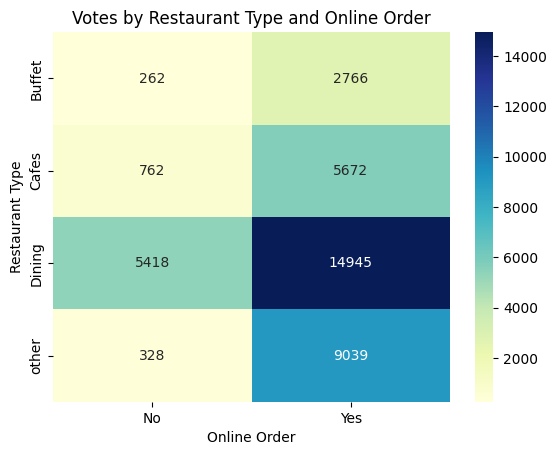

In [18]:

# Pivot table and heatmap
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', values='votes', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='.0f')
plt.title("Votes by Restaurant Type and Online Order")
plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")
plt.show()
